### Latihan
1. hapus kolom target
2. Lakukan EDA dan Pre-Processing sesuai dengan tujuan analisis dan kondisi data! Hasil dari EDA dan pre-processing dapat diinterpretasikan
3. Lakukan pemodelan menggunakan algoritma k-means, buat penentuan nilai k dengan membuat diagram elbow, serta simpan hasil label dari algoritma k-means menjadi kolom baru di data tersebut, buat nama kolom menjadi “Label_K-Means”!
4. Lakukan pemodelan menggunakan algoritma db-scan, simpan hasil label dari algoritma db-scan menjadi kolom baru di data tersebut, buat nama kolom menjadi “Label_DB-Scan”!
5. Buat plot hasil permodelan menggunakan k-means dan db-scan! Interpretasikanlah hasil plot yang didapat!
6. Menggunakan matriks evaluasi Silhouette score dan Davies-Bouldin Index, tentukan mana model dengan nilai evaluasi terbaik! Interpretaskanlah hasil matriks evaluasi yang didapat!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.metrics import davies_bouldin_score, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
plt.style.use("fivethirtyeight")

In [3]:
# Load Data
data = pd.read_csv('/content/Dataset-Tugas.csv')
print(data)

     sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


#### 1. Menghapus Kolom Target

In [4]:
# Menghapus Kolom Target
data.drop('class', axis=1, inplace=True)
data.head()

# Menghapus targetnya yaitu "class" dalam dataset tersebut

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### 2. Lakukan EDA dan Pre-Processing sesuai dengan tujuan analisis dan kondisi data! Hasil dari EDA dan pre-processing dapat diinterpretasikan

##### Pre-Processing

In [5]:
data = pd.read_csv('/content/Dataset-Tugas.csv')
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.shape

(150, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.isnull().sum() #-> untuk mengecek missing value

,0
sepal length,0
sepal width,0
petal length,0
petal width,0
class,0


In [9]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##### EDA

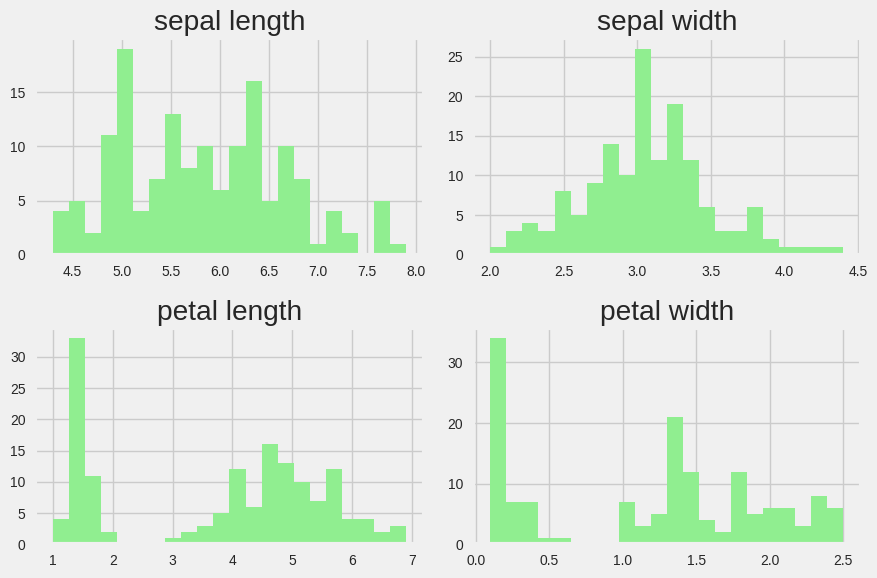

In [10]:
# Menggunakan Histogram
data.hist(figsize=(9, 6), bins=22, color='lightgreen')
plt.tight_layout()
plt.show()

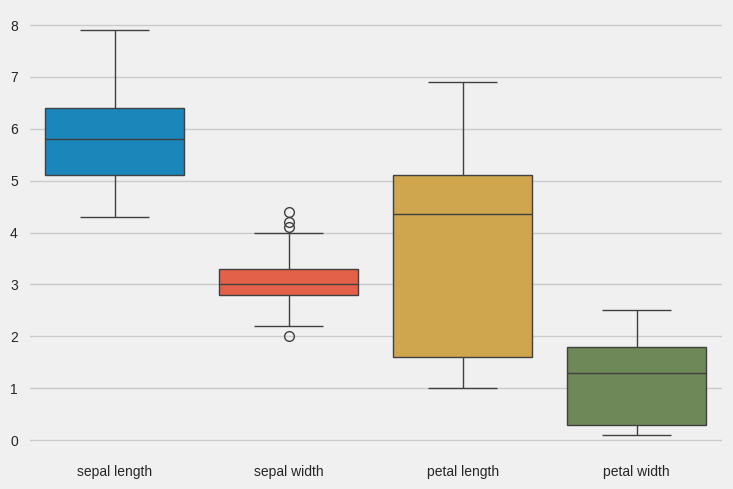

In [11]:
# Menggunakan Box Plot
sns.boxplot(data)
plt.show()

Interpretasi Pre-Processing :

Data iris diatas memperoleh jumlah baris dataset tersebut sebanyak 150 dan kolomnya sebanyak 4. Lalu kita ingin menampilkan informasi apa saja yag terdapat dalam dataset tersebut dengan menggunakan data.info() dan ya outputnya adalah bahwa data tersebut tidak bersifat NULL. Lalu mengecek apakah data tersebut terdapat missing value dan ya outputnya adalah data tersebut tidak mengandung missing value. Selanjutnya jika kita ingin mengetahui mean, std, min, max, dsb bisa menggunakan data.describe() yang digunakan untuk menghasilkan statistic deskriptif dari data numerik tersebut.

Untuk diagram Histogram tersebut, dapat disimpulkan bahwa:

Interpretasi EDA :
> Sepal Length = dari data diatas kita mengetahui bahwa data "sepal length" memiliki rentang nilai kelopak bunga tersebut = 4.5 - 8.0, rentang nilai maksimal  berada di 5.0, dan rentang nilai minimal berada di 7.0 dan 7.9.
Lalu untuk frekuensi dari interval panjang kelopak bunga tersebut = 0.0 - 17.5++, frekuensi interval maksimal berada di > 17.5, dan frekuensi interval minimal berada di < 2.5.

> Sepal Width = dari data diatas kita mengetahui bahwa data "sepal width" memiliki rentang nilai kelopak bunga tersebut = 2.0 - 4.5, rentang nilai maksimal berada 3.0, dan rentang nilai minimal berada 2.0 dan 4.0 - 4.5.
Lalu untuk frekuensi dari interval panjang kelopak bunga tersebut = 0 - 25, interval maksimal berada di > 25, dan interval minimal berada di < 3.

> Petal Length = dari data diatas kita mengetahui bahwa data "petal length" memiliki rentang nilai kelopak bunga tersebut = 1 - 7, rentang nilai maksimal berada 1.5, dan rentang nilai minimal berada 6.5.
Lalu untuk frekuensi dari interval panjang kelopak bunga tersebut = 0 - 30++, interval maksimal berada di > 35, dan interval minimal berada di < 3.

> Petal Width = dari data diatas kita mengetahui bahwa data "petal width" memiliki rentang nilai kelopak bunga tersebut = 0.0 - 2.5, rentang nilai maksimal berada < 0.5, dan rentang nilai minimal berada 0.5.
Lalu untuk frekuensi dari interval panjang kelopak bunga tersebut = 0 - 35, interval maksimal berada di < 35, dan interval minimal berada di < 2.


Lalu untuk diagram boxplot tersebut, dapat disimpulkan bahwa:

> Sepal Length = memiliki nilai median sekitar 5.8, untuk Q1 sekitar 5.2, untuk Q3 sekitar 6.5, dan untuk kondisi data tersebut aman, tidak ada missing value maupun data yang outliers.

> Sepal Width = memiliki nilai median sekitar 3.0, untuk Q1 sekitar 2.8, untuk Q3 sekitar 3.4, dan untuk kondisi data tidak terdapat missing value tetapi ada data yang outliers.

> Petal Length = memiliki nilai median sekitar 4.35, untuk Q1 sekitar 3.5, untuk Q3 sekitar 5.1, dan untuk kondisi data tersebut aman, tidak ada missing value maupun data yang outliers.

> Petal Width = memiliki nilai median sekitar 1.3, untuk Q1 sekitar 1.0, untuk Q3 sekitar 1.8, dan untuk kondisi data tersebut aman, tidak ada missing value maupun data yang outliers.

#### 3. Lakukan pemodelan menggunakan algoritma k-means, buat penentuan nilai k dengan membuat diagram elbow, serta simpan hasil label dari algoritma k-means menjadi kolom baru di data tersebut, buat nama kolom menjadi “Label_K-Means”!

##### Menggunakan algoritma K-Means


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
# Scalling
# instantiate
scaler = StandardScaler()

# fit_transform
x_scaled = scaler.fit_transform(data)
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00, -1.22474487e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00, -1.22474487e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00

##### Buat penentuan nilai k dengan membuat diagram elbow

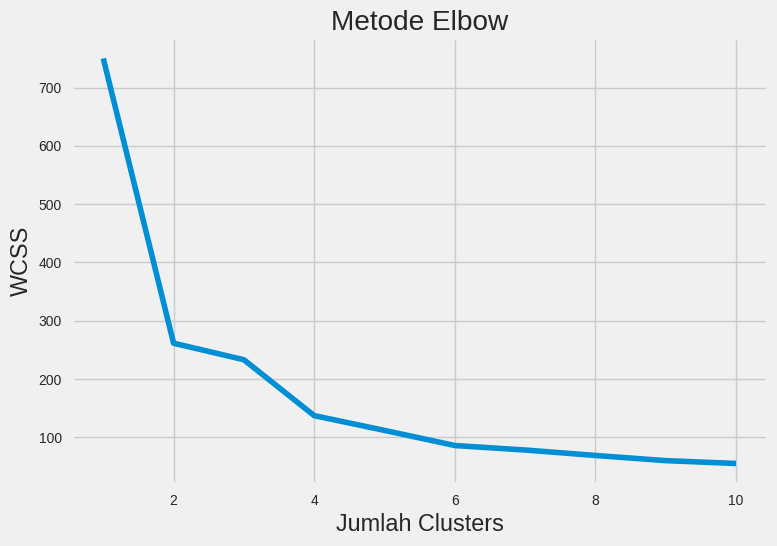

In [14]:
# Edometer -> buat mencari data yg sesuai dengan klusternya.
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("Metode Elbow")
plt.xlabel("Jumlah Clusters")
plt.ylabel("WCSS")
plt.show()

##### simpan hasil label dari algoritma k-means menjadi kolom baru di data tersebut

In [15]:
# simpan hasil label dari algoritma k-means menjadi kolom baru di data tersebut
model1 = KMeans(n_clusters=2, init="k-means++", random_state=42)
y_pred1 = model1.fit_predict(x_scaled)

##### buat nama kolom menjadi “Label_K-Means”

In [16]:
# buat nama kolom menjadi “Label_K-Means”
data['Label_K-Means'] = y_pred1
data.rename(columns={data.columns[-1]: 'Label_K-Means'}, inplace=True)
print(data.head())

   sepal length  sepal width  petal length  petal width  class  Label_K-Means
0           5.1          3.5           1.4          0.2      0              0
1           4.9          3.0           1.4          0.2      0              0
2           4.7          3.2           1.3          0.2      0              0
3           4.6          3.1           1.5          0.2      0              0
4           5.0          3.6           1.4          0.2      0              0


#### 4. Lakukan pemodelan menggunakan algoritma db-scan, simpan hasil label dari algoritma db-scan menjadi kolom baru di data tersebut, buat nama kolom menjadi “Label_DB-Scan”!

##### Lakukan pemodelan menggunakan algoritma db-scan

In [17]:
# Membuat objek DBSCAN dengan parameter epsilon dan jumlah minimum sampel
model2 = DBSCAN(eps=1, min_samples=5)

# Melakukan clustering
model2.fit(x_scaled)

# Mendapatkan label klaster untuk setiap data (-1 menandakan nosie)
y_pred2 = model2.labels_
y_pred2

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
        2,  2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2])

##### Simpan hasil label dari algoritma db-scan menjadi kolom baru di data tersebut, buat nama kolom menjadi “Label_DB-Scan”

In [18]:
# Menyimpan Hasil Label Ke Dalam Kolom Baru Data Tersebut
data['Label_DB-Scan'] = y_pred2
data.rename(columns={data.columns[-1]: 'Label_DB-Scan'}, inplace=True)
print(data.head())

   sepal length  sepal width  petal length  petal width  class  Label_K-Means  \
0           5.1          3.5           1.4          0.2      0              0   
1           4.9          3.0           1.4          0.2      0              0   
2           4.7          3.2           1.3          0.2      0              0   
3           4.6          3.1           1.5          0.2      0              0   
4           5.0          3.6           1.4          0.2      0              0   

   Label_DB-Scan  
0              0  
1              0  
2              0  
3              0  
4              0  


#### 5. Buat plot hasil permodelan menggunakan k-means dan db-scan! Interpretasikanlah hasil plot yang didapat!

###### Buat Plot Hasil Permodelan Menggunakan K-Means

In [19]:
# Buat plot hasil permodelan menggunakan k-means
model1 = KMeans(n_clusters=2, init="k-means++", random_state=42)
y_pred1 = model1.fit_predict(x_scaled)

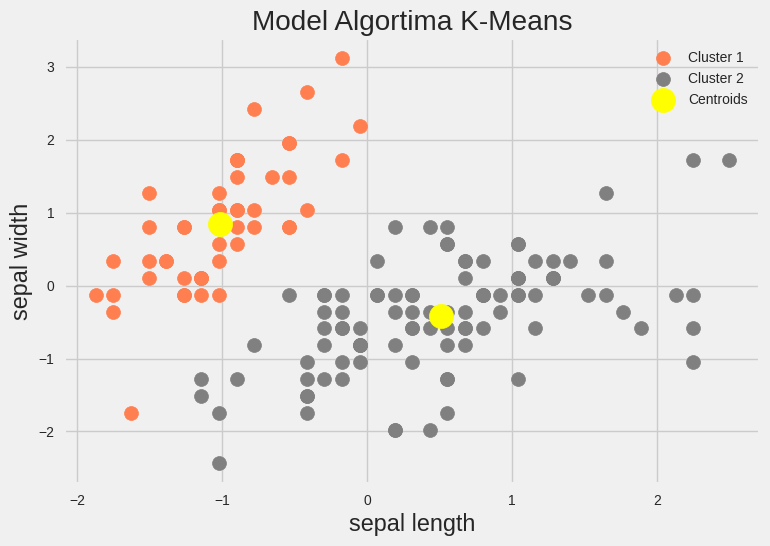

In [26]:
# Visualisasi Algoritma K-Means
plt.scatter(x_scaled[y_pred1 == 0, 0], x_scaled[y_pred1 == 0, 1],
            s = 100, c = 'coral', label = 'Cluster 1')

plt.scatter(x_scaled[y_pred1 == 1, 0], x_scaled[y_pred1 == 1, 1],
            s = 100, c = 'grey', label = 'Cluster 2')

plt.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 1],
            s = 300, c = 'yellow', label = 'Centroids')

plt.title('Model Algortima K-Means')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

##### Buat Plot Hasil Permodelan Menggunakan DB-Scan

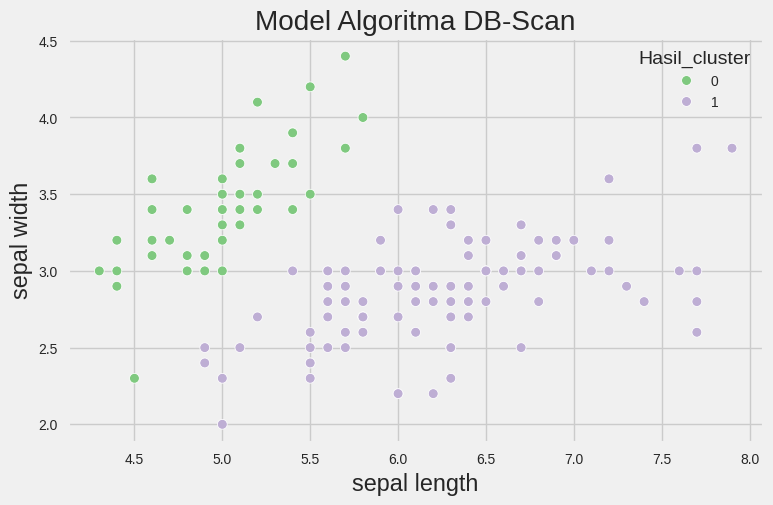

In [21]:
# Buat visualisasi hasil permodelan menggunakan db-scan
plt.figure(figsize=(8,5))
data['Hasil_cluster'] = y_pred1

sns.scatterplot(x = 'sepal length', y = 'sepal width',
                hue = 'Hasil_cluster', data = data, palette = 'Accent', s = 50)
plt.title('Model Algoritma DB-Scan')
plt.show()

Interpretasi:

1. Modelling Algoritma K-Means

Dari hasil scatter plot model k-means diatas kita mengetahui bahwa cluster untuk sepal width memiliki rentang nilai sumbu x = -2 sampai 0, dan untuk rentang nilai sumbu y = 0 sampai 3. Sedangkan cluster untuk sepal length memiliki rentang nilai sumbu x = -1 sampai 2, dan untuk rentang nilai sumbu y = -2 sampai 2. Lalu untuk centroidnya yaitu yg berwarna kuning, yang dimana letak centroid tersebut berada di titik (-1,1).

Maka kesimpulannya, data cluster 1 dia lebih deket ke centroid, data yang termaksud ke dalam data homogen yaitu data yang meminimalkan jarak antar data dalam cluster yang sama, selain itu data yang memiliki kemiripan fitur yang lebih kuat satu sama lain, dan jika dimasukkan kedalam contoh tanaman bunga iris, cluster 1 memiliki bentuk bunga yang lebar dan lebih besar.
Berbeda hal dengan data cluster 2 dia memiliki data titik-titik yang banyak tersebar serta bervariasi, data yang termasuk ke dalam data heterogen yaitu data yang memaksimalkan jarak antar cluster, selain itu data yang memiliki kemiripan pola yang lebih kuat satu sama lain, dan jika dimasukkan kedalam contoh tanaman bunga iris, cluster 1 memiliki bentuk bunga yang lebih panjang.

2. Modelling Algoritma DB-Scan

Dari hasil scatter plot model db-scan diatas kita mengetahui bahwa cluster untuk sepal width memiliki rentang nilai sumbu x = 4.5 sampai 5.5, dan untuk rentang nilai sumbu y = 2.0 sampai 4.5. Sedangkan cluster untuk sepal length memiliki rentang nilai sumbu x = 5.0 sampai 7.5, dan untuk rentang nilai sumbu y = 2.0 sampai 3.5.

Maka kesimpulannya, scatter plot pada model db-scan dapat memanfaatkan kepadatan lokal data dalam memisahkan 2 kelompok yang berbeda. Data dalam cluster 0 memiliki kelopak yang besar yaitu sepal width daripada sepal length yang memiliki kelopak yang kecil. Berbeda hal dengan cluster 1 memiliki kelopak besar yaitu sepal length daripda sepal width yang memiliki kelopak kecil.

#### 6. Menggunakan matriks evaluasi Silhouette score dan Davies-Bouldin Index, tentukan mana model dengan nilai evaluasi terbaik! Interpretaskanlah hasil matriks evaluasi yang didapat!

##### Menggunakan matriks evaluasi Silhouette score dan Davies-Bouldin Index

In [22]:
# Matriks Evaluasi Silhoutte Score
score = silhouette_score(x_scaled, y_pred1)
print("Matriks Silhoutte Score: ", score)

Matriks Silhoutte Score:  0.590106337997557


In [23]:
# Matriks Evaluasi Davies Bouldin Index
score = davies_bouldin_score(x_scaled, y_pred1)
print("Matriks Davies Bouldin Index: ", score)

Matriks Davies Bouldin Index:  0.5701296582799077


##### tentukan mana model dengan nilai evaluasi terbaik! Interpretasikanlah hasil matriks evaluasi yang didapat!

Interpretasi
Dari hasil nilai matriks, model Silhoutte Score memiliki nilai sebesar 59%, dan model  Davies Bouldin Index memiliki nilai sebesae 57%. Lalu manakah model dengan nilai evaluasi terbaik?

Model yang memiliki nilai evaluasi terbaik ialah model Silhoutte Score. Karena nilai model ini mendekati 1, yang dimana nilai model tersebut semakin tinggi, maka semakin baik nilai model tersebut antar klusternya.

Model Silhoutte Score lebih akurat karena model tersebut memberikan interpretasi yang jelas dalam menentukan jumlah kluster dan mengevaluasi klustering secara efektif.

